# Phân loại với KNN

In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Tạo 1 cái array từ link, sau đó phân tách link đó bằng ký tự để trong (), ở đây là dấu /
link.split('/')


# Vị trí -2 từ dưới đếm lên
link.split('/')[-2]

'1NZw2FidIkeCTdBLyp9jGC5FQ-0vCPc-b'

In [ ]:
link = 'https://drive.google.com/file/d/1NZw2FidIkeCTdBLyp9jGC5FQ-0vCPc-b/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)
df

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes
5,6,rainy,cool,normal,strong,no
6,7,overcast,cool,normal,strong,yes
7,8,sunny,mild,high,weak,no
8,9,sunny,cool,normal,weak,yes
9,10,rainy,mild,normal,weak,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14 non-null     int64 
 1   outlook      14 non-null     object
 2   temperature  14 non-null     object
 3   humidity     14 non-null     object
 4   wind         14 non-null     object
 5   play         14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
# Chuyển dữ liệu dạng sang dạng số

from sklearn.preprocessing import LabelEncoder

# convert_to_num = LabelEncoder().fit_transform()

df = df.apply(LabelEncoder().fit_transform)
df

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1
5,5,1,0,1,0,0
6,6,0,0,1,0,1
7,7,2,2,0,1,0
8,8,2,0,1,1,1
9,9,1,2,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
y = df['play'].values
X = df.iloc[:, 1:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [ ]:
y_train.size

11

In [ ]:
y_test.size

3

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')

knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [ ]:
# Đánh giá
knn_model.score(X_test, y_test)

0.40927863779070617

# Bài toán phân loại, sử dụng KNeighborsClassifier, bạn sử dụng nhầm KNeighborsRegressor

In [ ]:
from sklearn import metrics

y_pred = knn_model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

ValueError: ignored

In [ ]:
# KNN for classification Giả sử chọn K=5, trong 5 điểm dữ liệu gần điểm dữ liệu cần dự đoán nhất, có 3 điểm dữ liệu có nhãn là 1, 1 điểm dữ liệu có nhãn là 0, 1 điểm dữ liệu có nhãn là 2 -> mô hình KNN cho đầu ra của điểm dữ liệu cần dự đoán ban đầu là nhãn 1

# KNN for regression Giả sử chọn K=5 ->  mô hình KNN cho đầu ra của điểm dữ liệu cần dự đoán ban đầu là Trung bình của 5 điểm

In [ ]:
# Classification
# confusion matrix = TP, TN, FP, FN:
# TP: True Positive - mô hình dự đoán đầu ra của dữ liệu x là 1, và nhãn thực sự của dữ liệu x là 1 - Dự đoán đúng
# TN: True Negative - mô hình dự đoán đầu ra của dữ liệu x là 0, và nhãn thực sự của dữ liệu x là 0 - Dự đoán đúng
# FP:
# FN:
# F1 score, Accuracy score, Precision, Recall

# Regression
# Nhãn là giá trị liên tục. VD: chiều cao 1,68 ; 1,75, 1,83, 1,90
# Đầu ra của mô hình                      1,68 ; 1,78, 1,50, 1,30
# MSE - mean square error: 1/2(y - y^)2,
# MAE - Mean absolute error
# R-square - coefficient of determination


NameError: ignored

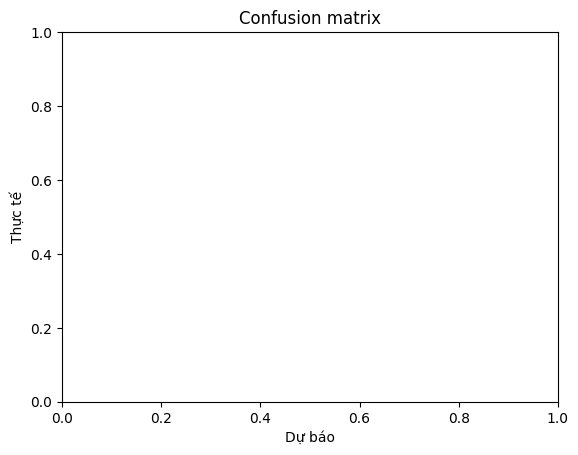

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

plt.title('Confusion matrix')
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression

# Tính R2 - là 1 metrics
# Predict dữ liệu, sử dụng metrics để so khớp nhãn và đầu ra của mô hình